# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [102]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)
df.tail(2)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05
29999,10038,Squeeze,M,Shih Tzu,NaN,TAN,WHITE,NaN,2012-03-01,Yes,No,Yes,2015-08-22 19:20:53.700,2015-08-22,2016-07-23


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.shape

(30000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29939 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           30000 non-null  object        
 4   Secondary Breed         3988 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [5]:
# Each row is a registered dog in NYC. 'Owner Zip Code' is the zip code the owner(or person who registered the dog) entered in the registration. 'Animal Name' is the name, the owner gave at the registation. 

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [6]:
# are more female or male dogs registered in NYC?
# which borough / zip code has the most dogs?
# Where there more dogs registered during Covid?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: ylabel='Primary Breed'>

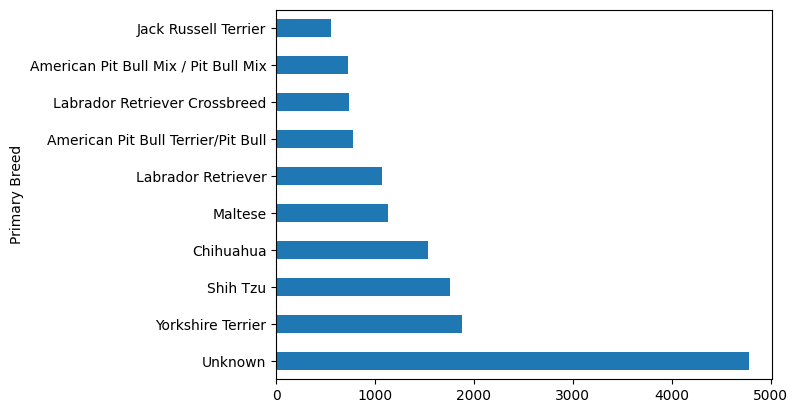

In [7]:
df['Primary Breed'].value_counts().head(10).plot(kind='barh')

In [8]:
df['Primary Breed']

0                     Unknown
1                  Rottweiler
2        Australian Cattledog
3                     Unknown
4                     Basenji
                 ...         
29995                 Unknown
29996    Schnauzer, Miniature
29997              Pomeranian
29998                 Unknown
29999                Shih Tzu
Name: Primary Breed, Length: 30000, dtype: object

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

In [9]:
df['Primary Breed'].replace('Unknown', None, inplace=True)

<Axes: ylabel='Primary Breed'>

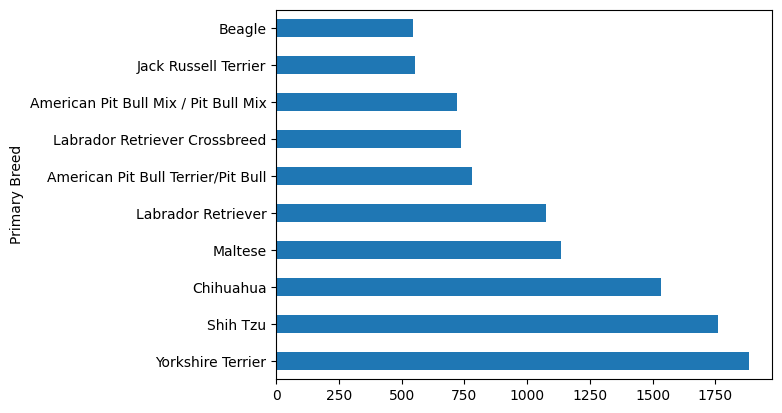

In [10]:
df['Primary Breed'].value_counts().head(10).plot(kind='barh')

## What are the most popular dog names?

In [11]:
df['Animal Name'].value_counts()

Animal Name
UNKNOWN          203
Max              202
Unknown          197
Bella            193
Charlie          172
                ... 
Bluno              1
DARBY              1
CHARLEY VIVAR      1
TINY               1
Squeeze            1
Name: count, Length: 13720, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [12]:
df['Animal Name'].str.contains(r'\bHelena\b', case=False, na=False).value_counts()

Animal Name
False    30000
Name: count, dtype: int64

In [13]:
df['Animal Name'].str.contains(r'\bMax\b', case=False, na=False).value_counts()

Animal Name
False    29658
True       342
Name: count, dtype: int64

In [14]:
df['Animal Name'].str.contains(r'\bMaxwell\b', case=False, na=False).value_counts()

Animal Name
False    29976
True        24
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

In [15]:
df['Guard or Trained'].value_counts(normalize=True, dropna=False)

Guard or Trained
No     0.660300
NaN    0.339133
Yes    0.000567
Name: proportion, dtype: float64

## What are the actual numbers?

In [16]:
df['Guard or Trained'].value_counts(dropna=False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [17]:
df['Guard or Trained'].replace('NaN','No', inplace=True)

/var/folders/25/xw7xjnd96d97pcydyrv0516h0000gn/T/ipykernel_22457/3498974352.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Guard or Trained'].replace('NaN','No', inplace=True)


In [18]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

## What are the top dog breeds for guard dogs? 

In [19]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [20]:
df['year'] = df['Animal Birth'].dt.to_period('Y')
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,None,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,None,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [21]:
df['year'] = df['year'].dt.year

In [22]:
df['year'].dtype

dtype('int64')

In [23]:
df['age'] = 2025 - df['year']

In [24]:
df.head(5)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,None,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11
3,10025,Buddy,M,None,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [25]:
zipcode = pd.read_csv('zipcodes-neighborhoods.csv')
zipcode

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [26]:
merged = df.merge(zipcode, left_on='Owner Zip Code', right_on='zip', how='left')

In [27]:
merged['borough'].value_counts()

borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: count, dtype: int64

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [28]:
merged.columns

Index(['Owner Zip Code', 'Animal Name', 'Animal Gender', 'Primary Breed',
       'Secondary Breed', 'Animal Dominant Color', 'Animal Secondary Color',
       'Animal Third Color', 'Animal Birth', 'Spayed or Neut',
       'Guard or Trained', 'Vaccinated', 'Application Date',
       'License Issued Date', 'License Expired Date', 'year', 'age',
       'neighborhood', 'zip', 'borough'],
      dtype='object')

In [29]:
merged['Primary Breed'].isna().value_counts()

Primary Breed
False    25223
True      4777
Name: count, dtype: int64

In [30]:
merged.groupby('borough')['Primary Breed'].value_counts().reset_index(name='count').pivot(index='Primary Breed', columns='borough', values='count').fillna(0).astype(int).sort_values(by='Bronx', ascending=False)

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Primary Breed,,,,,
Yorkshire Terrier,250,501,505,434,171
Shih Tzu,244,481,454,395,165
Chihuahua,208,391,511,306,100
American Pit Bull Terrier/Pit Bull,181,219,122,175,79
Maltese,139,247,332,305,93
...,...,...,...,...,...
Goldendoodle,0,0,4,0,0
Giant Schnauzer,0,1,1,0,1
German Pinscher,0,1,0,1,0


## What is the most common dog breed in each of the neighborhoods of NYC?

In [31]:
merged.groupby('borough')['Primary Breed'].value_counts().reset_index(name='count').pivot(index='Primary Breed', columns='borough', values='count').fillna(0).astype(int).sort_values(by='Bronx', ascending=False)

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Primary Breed,,,,,
Yorkshire Terrier,250,501,505,434,171
Shih Tzu,244,481,454,395,165
Chihuahua,208,391,511,306,100
American Pit Bull Terrier/Pit Bull,181,219,122,175,79
Maltese,139,247,332,305,93
...,...,...,...,...,...
Goldendoodle,0,0,4,0,0
Giant Schnauzer,0,1,1,0,1
German Pinscher,0,1,0,1,0


## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [32]:
merged['Animal Gender'].isnull().value_counts()

Animal Gender
False    30000
Name: count, dtype: int64

In [33]:
merged['Spayed or Neut'].isna().value_counts()

Spayed or Neut
False    30000
Name: count, dtype: int64

In [34]:
merged.groupby('Animal Gender')['Spayed or Neut'].value_counts(normalize=True).unstack()

Spayed or Neut,No,Yes
Animal Gender,,
,NaN,1.000000
F,0.142150,0.857850
M,0.208144,0.791856


In [35]:
merged.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).unstack().sort_values(by='No', ascending=False).query("No == 1.0")

Spayed or Neut,No,Yes
Primary Breed,,
Mudi,1.0,NaN
"Mastiff, Tibetan",1.0,NaN
Dogo Argentino,1.0,NaN
Treeing Tennessee Brindle,1.0,NaN
Karelian Bear Dog,1.0,NaN
Kooikerhondje,1.0,NaN
Canaan Dog,1.0,NaN
French Spaniel,1.0,NaN
Fila Brasileiro,1.0,NaN


## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

<Axes: ylabel='borough'>

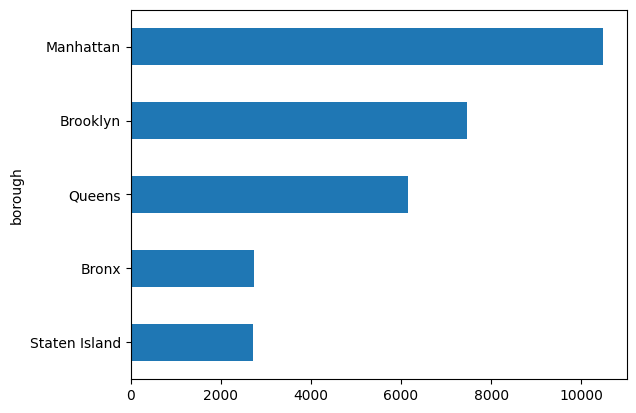

In [36]:
merged['borough'].value_counts(ascending=True).plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [37]:
population = pd.read_csv('boro_population.csv')

In [38]:
dogs = merged['borough'].value_counts(ascending=True).to_frame()

In [39]:
dogs_population = dogs.merge(population, left_on='borough', right_on='borough', how='left')

In [42]:
dogs_population

,borough,count,population,area_sqmi
0,Staten Island,2727,474558,59
1,Bronx,2748,1455444,42
2,Queens,6154,2339150,109
3,Brooklyn,7466,2636735,71
4,Manhattan,10478,1644518,23


In [43]:
dogs_population['dogs_per_capita'] = dogs_population['count'] / dogs_population['population']

In [44]:
dogs_population.sort_values(by='dogs_per_capita')

,borough,count,population,area_sqmi,dogs_per_capita
1,Bronx,2748,1455444,42,0.001888
2,Queens,6154,2339150,109,0.002631
3,Brooklyn,7466,2636735,71,0.002832
0,Staten Island,2727,474558,59,0.005746
4,Manhattan,10478,1644518,23,0.006371


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [87]:
top5 = merged.groupby('borough')['Primary Breed'].value_counts(ascending=False).groupby(level=0).head(5).reset_index().sort_values(by='borough', ascending=False)
top5

,borough,Primary Breed,count
24,Staten Island,Maltese,93
23,Staten Island,Chihuahua,100
22,Staten Island,Labrador Retriever,123
21,Staten Island,Shih Tzu,165
20,Staten Island,Yorkshire Terrier,171
19,Queens,Labrador Retriever,208
18,Queens,Maltese,305
17,Queens,Chihuahua,306
16,Queens,Shih Tzu,395
15,Queens,Yorkshire Terrier,434


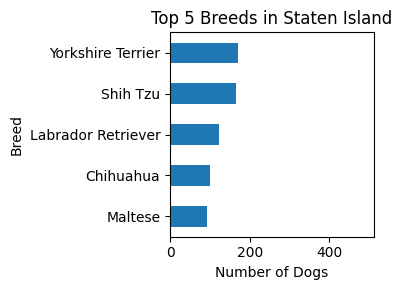

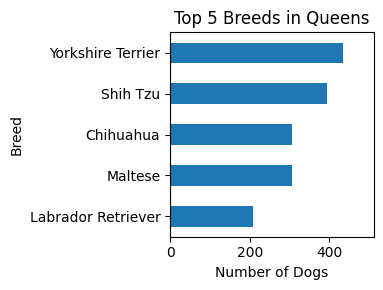

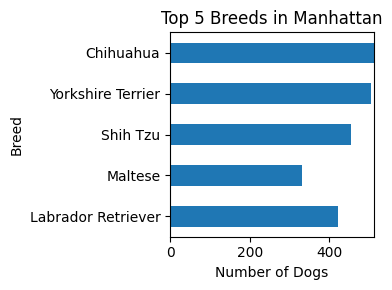

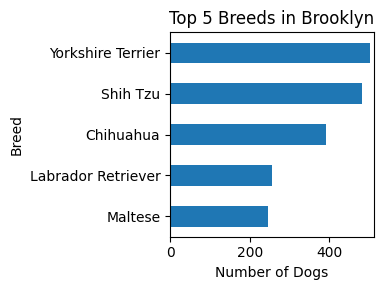

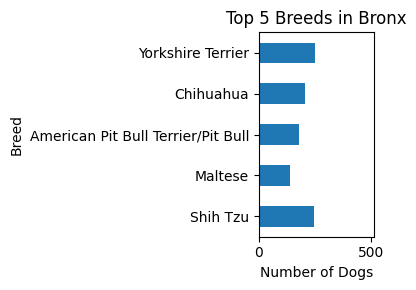

In [104]:
for borough in top5['borough'].unique():
    top5.query("borough == @borough").set_index('Primary Breed')['count'].plot(
        kind='barh',
        title=f"Top 5 Breeds in {borough}",
        figsize=(4, 3),
    )
    plt.xlabel('Number of Dogs')
    plt.xlim(0, max_count)
    plt.ylabel('Breed')
    plt.tight_layout()
    plt.show()

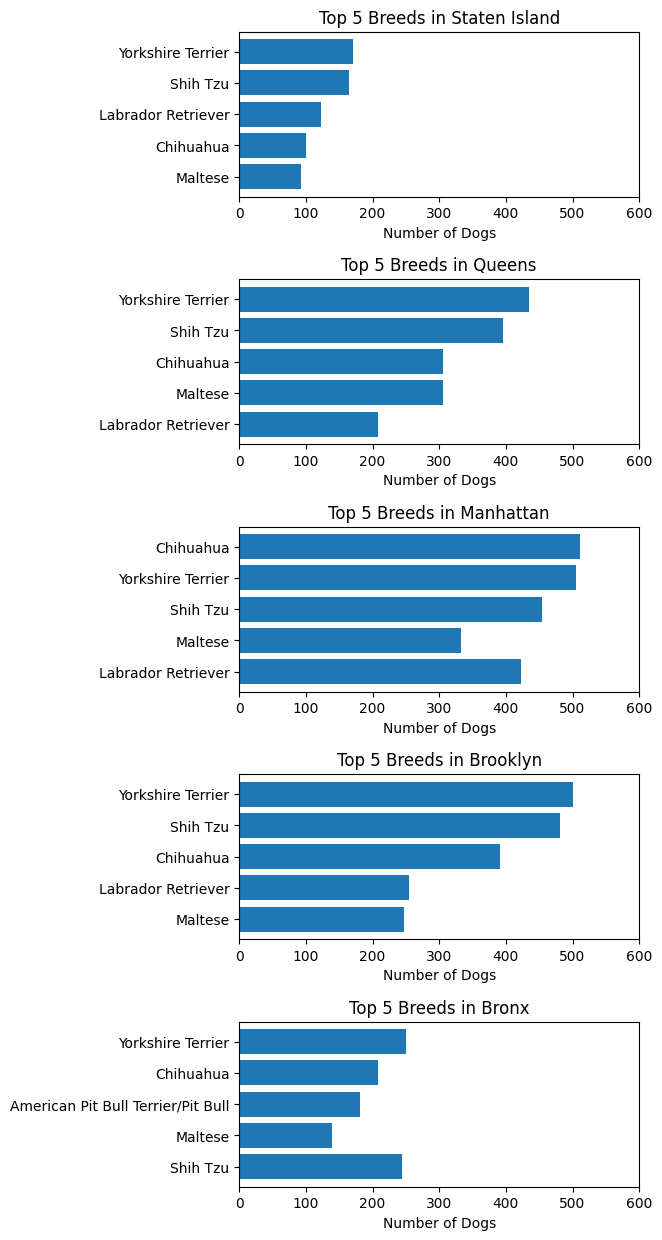

In [117]:
# fix from chat gpt to get the axes in the same scale, because I could not figure out how to fix the Bronx and it made my crazy.

# Just to be sure: set style to default

boroughs = top5['borough'].unique()
max_count = top5['count'].max()
xticks = np.arange(0, max_count + 100, 100)

fig, axes = plt.subplots(
    nrows=len(boroughs),
    figsize=(8, 3 * len(boroughs)),
    sharex=True
)

# Ensure axes is always iterable
if len(boroughs) == 1:
    axes = [axes]

for ax, borough in zip(axes, boroughs):
    data = top5[top5['borough'] == borough]
    ax.barh(data['Primary Breed'], data['count'])
    ax.set_title(f"Top 5 Breeds in {borough}")
    ax.set_xlim(0, max_count)
    ax.set_xticks(xticks)
    ax.tick_params(labelbottom=True)
    ax.set_xlabel('Number of Dogs')

plt.subplots_adjust(left=0.4, hspace=0.5)
plt.show()